#                                              BRAIN TUMOR DETECTION

For our 1st project, we've decided to build and train a convolutional neural network that's capable of telling whether someone has a brain tumor from their MRI images. We're using a dataset we found on Kaggle, available at this link: https://www.kaggle.com/ahmedhamada0/brain-tumor-detection. 

## Exploratory Data analysis

In [2]:
#Importing necessary libraries 

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import skimage.transform as trans

from matplotlib.image import imread

In [3]:
#location of the data

data_path = "C:\\Users\\HP\\Desktop\\Data"

In [4]:
#contents in the data file

os.listdir(data_path)

['Br35H-Mask-RCNN', 'no', 'pred', 'yes']

In [5]:
os.listdir(data_path+'\\yes\\')[0]

'y0.jpg'

In [6]:
dir_Tumor_pic = data_path+'\\yes\\'+'y0.jpg'

In [7]:
imread(dir_Tumor_pic).shape

(348, 287, 3)

**The tuple provided specifies the image's height, width, and color.** 

**The MRI scan shows an individual with a brain tumor.**

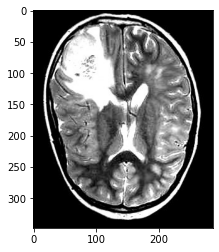

In [7]:
plt.imshow(imread(dir_Tumor_pic))

In [8]:
os.listdir(data_path+'\\no\\')[0]

'no0.jpg'

In [9]:
dir_not_Tumor_pic = data_path+'\\NO\\' + 'no0.jpg'

imread(dir_not_Tumor_pic).shape

(630, 630, 3)

**The MRI scan displays an individual without a brain tumor**

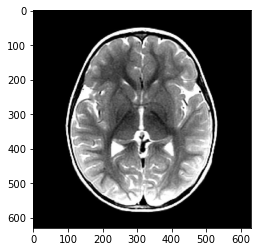

In [10]:
plt.imshow(imread(dir_not_Tumor_pic))

**Counting the number of images that show no brain tumor.**

In [9]:
len(os.listdir(data_path+'\\no\\'))

1500

**Counting the number of images that display a brain tumor**

In [10]:
len(os.listdir(data_path+'\\yes\\'))


1500

**The total collection of 3000 images is evenly split between those with brain tumors and those without, each category having 1500 images**

**Creating a graph to compare the height and width of images that have brain tumors**

In [13]:
dimension_1 =[]
dimension_2 =[]

for image_filename in os.listdir(data_path+'\\YES\\'):
    img = imread(data_path+'\\YES\\'+image_filename)
    dimension_1.append((img.shape)[0])
    dimension_2.append((img.shape)[1])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


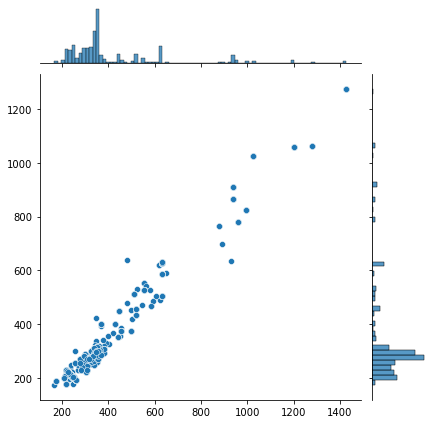

In [14]:
sns.jointplot(dimension_1,dimension_2)

**Different images has different dimensions**   

**Pictures showing brain tumors**

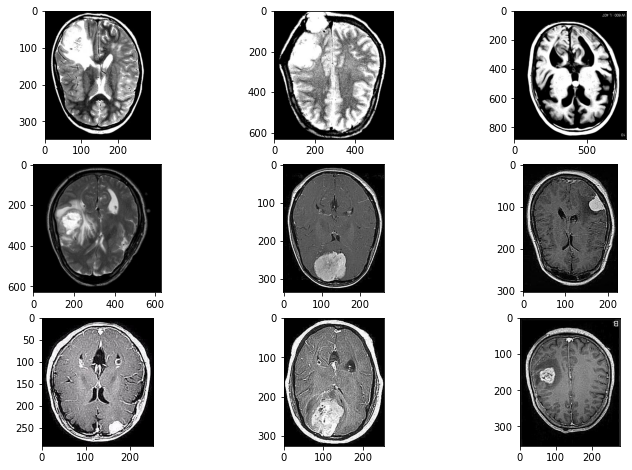

In [15]:
i=1
plt.figure(figsize = (12,8))
for image_filename in os.listdir(data_path+'\\yes\\'):
    if i<=9:
        plt.subplot(3,3,i)
        img = imread(data_path+'\\yes\\'+image_filename)
        plt.imshow(img)
        i = i +1
        

**Pictures not showing brain tumors**

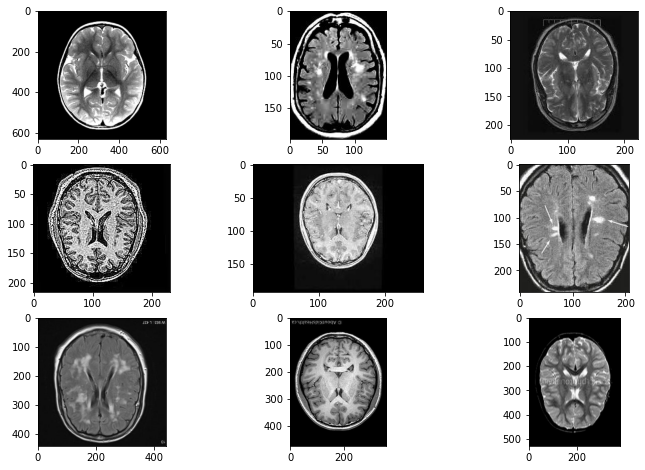

In [16]:
i=1
plt.figure(figsize = (12,8))
for image_filename in os.listdir(data_path+'\\no\\'):
    if i<=9:
        plt.subplot(3,3,i)
        img = imread(data_path+'\\no\\'+image_filename)
        plt.imshow(img)
        i = i +1

**The individual with a brain tumor has an unusual shape to their head**  

## Preprocessing

In [17]:
#Resizing  all the images with same dimesions
X=[]
y=[]
for image_filename in os.listdir(data_path+'\\yes\\'):
    
    image = imread(data_path+'\\yes\\'+image_filename)
    image = image/255
    image = trans.resize(image,(256,256,3))
    X.append(image)
    y.append(1)

In [18]:
for image_filename in os.listdir(data_path+'\\no\\'):
    
    image = imread(data_path+'\\no\\'+image_filename)
    image = image/255
    image = trans.resize(image,(256,256,3))
    X.append(image)
    y.append(0)

In [19]:
X = np.array(X)
y = np.array(y)
X = np.reshape(X,(len(X),256,256,3))


## Training the model

**Dividing the data into training and testing sets**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
X_train.shape

(2100, 256, 256, 3)

In [24]:
image_shape = (256,256,3)

In [25]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Activation,Flatten

In [26]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size = (3,3),input_shape = image_shape,activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size = (3,3),input_shape = image_shape,activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size = (3,3),input_shape = image_shape,activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))



model.add(Flatten())

model.add(Dense(255,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation = 'softmax'))

model.compile(loss ='sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'] )

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor='val_loss',restore_best_weights=True,patience=6)

In [66]:
model.fit(X_train,y_train,epochs = 20 ,validation_batch_size=32,validation_data=(X_test,y_test),callbacks = [early_stop])

Epoch 1/20
66/66 [==============================] - 66s 965ms/step - loss: 0.5193 - accuracy: 0.7652 - val_loss: 0.3292 - val_accuracy: 0.8611
Epoch 2/20
66/66 [==============================] - 65s 988ms/step - loss: 0.2960 - accuracy: 0.8786 - val_loss: 0.2216 - val_accuracy: 0.9222
Epoch 3/20
66/66 [==============================] - 64s 967ms/step - loss: 0.1664 - accuracy: 0.9390 - val_loss: 0.1108 - val_accuracy: 0.9644
Epoch 4/20
66/66 [==============================] - 64s 972ms/step - loss: 0.0967 - accuracy: 0.9657 - val_loss: 0.0844 - val_accuracy: 0.9711
Epoch 5/20
66/66 [==============================] - 65s 984ms/step - loss: 0.0463 - accuracy: 0.9843 - val_loss: 0.0828 - val_accuracy: 0.9733
Epoch 6/20
66/66 [==============================] - 65s 981ms/step - loss: 0.0344 - accuracy: 0.9905 - val_loss: 0.0973 - val_accuracy: 0.9778
Epoch 7/20
66/66 [==============================] - 65s 980ms/step - loss: 0.0235 - accuracy: 0.9924 - val_loss: 0.1107 - val_accuracy: 0.9678

## Result Analyze

In [67]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

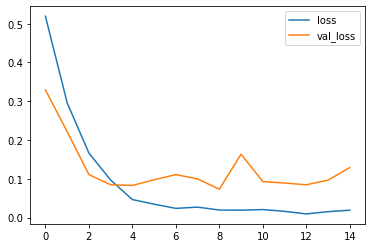

In [68]:
metrics[['loss','val_loss']].plot()

## Testing the model

In [69]:
predictions = model.predict(X_test)

In [70]:
max=np.argmax(predictions,axis=1)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
print(classification_report(max,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       426
           1       0.97      0.98      0.98       474

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [73]:
print(confusion_matrix(max,y_test))

[[414  12]
 [  8 466]]


**Acheived a model accuracy of 98%**

In [65]:
from tensorflow.keras.models import save_model,load_model

In [93]:
save_model(model,'CNNmodel.h5')

In [31]:
l_model=load_model('CNNmodel.h5')

In [58]:
image1=data_path+'\\pred\\'+'pred0.jpg'

In [59]:
def predict(image):
    plt.imshow(imread(image))
    image = imread(image)/255
    image = trans.resize(image,(256,256,3))
    image = np.array(image)
    image = np.reshape(image,(1,256,256,3))
    pr =l_model.predict(image)
    Max=np.argmax(pr,axis=1)
    if (Max == 0)[0]  :
        print("This person Don't have a Brain Tumor")
    if (Max == 1)[0] :
        print("This person have a Brain Tumor")

This person Don't have a Brain Tumor


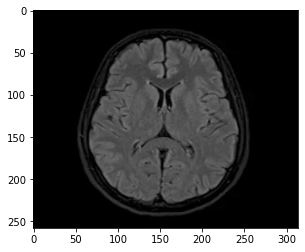

In [60]:
predict(image1)

This person have a Brain Tumor


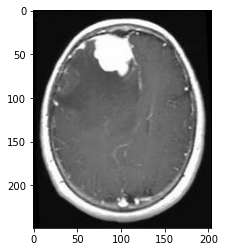

In [61]:
image2=data_path+'\\pred\\'+'pred7.jpg'
predict(image2)

This person have a Brain Tumor


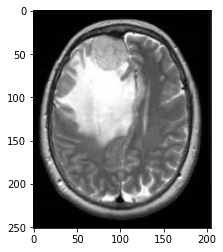

In [64]:
image3=data_path+'\\pred\\'+'pred5.jpg'
predict(image3)

# Conclusion

**The model determined the presence of a brain tumor in individuals with an accuracy of 98%**